# ADAP-ML Report

T-test and volcano plot


In [ ]:
import adapml_data
import adapml_classification
import adapml_chemometrics
import adapml_statistics
import numpy as np
import loadTestData as load_data
import sklearn.preprocessing as pre
from sklearn.cross_decomposition import PLSRegression as PLS
from matplotlib import pyplot as plt

###CHANGE DATA PATH FILE
path_to_data = '/Users/rerleman/Dropbox/My Mac (CCI00BHV2JALT)/Documents/ADAP-ML/data/SCLC_study_output_filtered_2.csv'
path_to_resp = '/Users/rerleman/Dropbox/My Mac (CCI00BHV2JALT)/Documents/ADAP-ML/data/SCLC_study_responses_2.csv'

data = adapml_data.DataImport(path_to_data)
response1D = adapml_data.DataImport.getResponse(path_to_resp);
response2D = adapml_data.DataImport.getDummyResponse(response1D);

variables = data.getVariableNames()
samples = data.getSampleNames()

t_test = adapml_statistics.Statistics(data.data, 'anova', response1D)
t_test.plot_logp_values(variables)
t_test.plot_volcano_t(variables)

# PCA
blabla

In [ ]:
#Normalize data
data.normalizeData("autoscale")
#Perform PCA
pca = adapml_chemometrics.Chemometrics(data.data, "pca", response1D)

print("PCA Projections");pca.plotProjectionScatterMultiClass(2, labels=["Healthy", "Not Healthy"])
print("PCA Vectors"); pca.plotVectorLoadings(variables, 1)



# PLS-DA


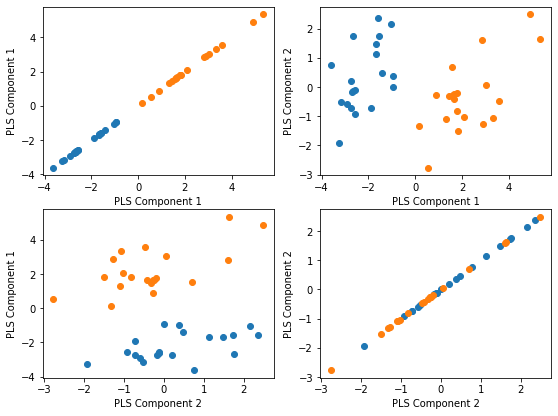

In [1]:
data2 = load_data.loadDataPandas('/Users/rerleman/Dropbox/My Mac (CCI00BHV2JALT)/Documents/ADAP-ML/data/SCLC_study_output_filtered_2.csv')

def plotProjectionScatterMultiClass(pc, resp, num_var):
    plt.figure(figsize=(24, 18))

    for i in range(num_var):
        for j in range(num_var):
            plt.subplot(5,5,5*(i) + j + 1)
            for c in range(resp.shape[1]):
                inx = np.where(resp[:,c] == 1)[0]
                tmp = pc[inx,:]
                pc1 = tmp[:,i]
                pc2 = tmp[:,j]
                plt.scatter(pc1, pc2)
            plt.xlabel("PLS Component "+str(i+1))
            plt.ylabel("PLS Component "+str(j+1))

    plt.show()


d = data2.to_numpy()
var_index = data.columns.values.tolist()

resp = load_data.getResponseMatrix2D()

norm_trans = pre.StandardScaler().fit(d)
data_norm = norm_trans.transform(d)
#data_norm, norm_trans = pre.mean_center(d)
#In-built preprocessing method - TBD

pls = PLS().fit(data_norm, resp)
pls_trans = pls.transform(data_norm)

plotProjectionScatterMultiClass(pls_trans, resp, 2)
